# Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Fraud.csv')

In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [4]:
dataset.shape

(6362620, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Statistical Description and inferences

In [6]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='type', ylabel='count'>

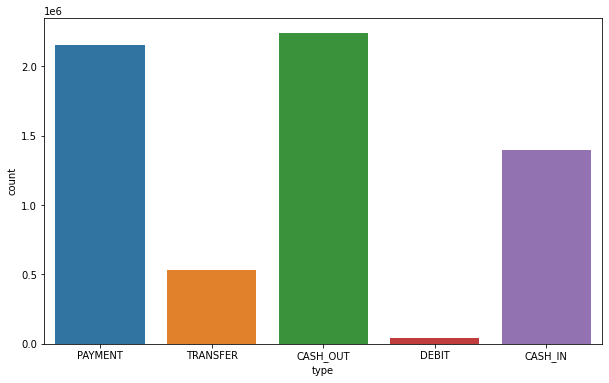

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=dataset)

Cash-out type is the highest in quantity in transfer types followed by payment and cash-in

In [8]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Dataset is imbalanced

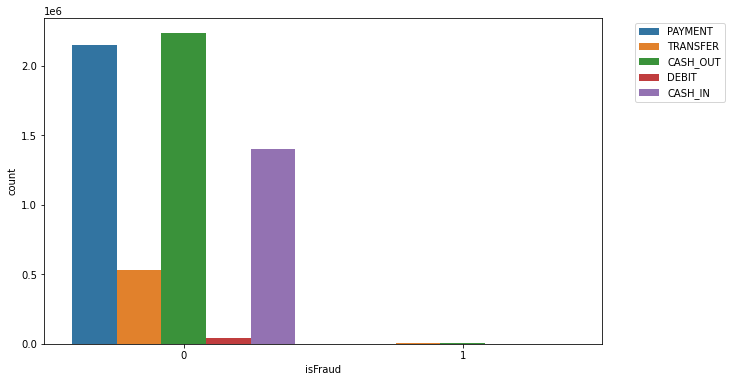

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', hue='type', data=dataset)
plt.legend(bbox_to_anchor=(1.05,1))

It shows that there are more fraudulent transactions in quantity through Cash-Out type

In [10]:
dataset_trans_over_two_lakh = dataset[dataset['amount'] > 200000]

<AxesSubplot:xlabel='isFraud', ylabel='count'>

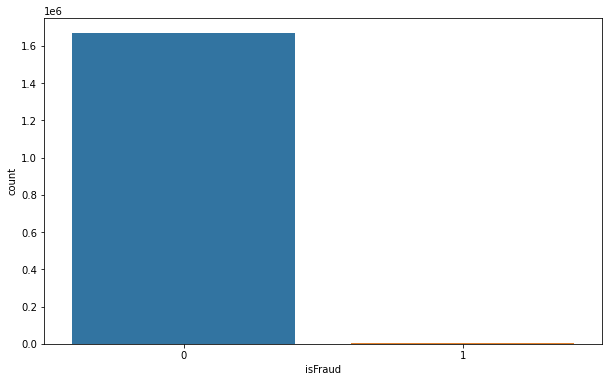

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', data=dataset_trans_over_two_lakh)

Almost all transactions over $ 200,000.00 are fraudulent

In [12]:
dataset_new_bal_is_zero = dataset[dataset['newbalanceOrig']==0]
dataset_new_bal_not_zero = dataset[dataset['newbalanceOrig']!=0]

In [13]:
dataset_new_bal_is_zero['isFraud'].value_counts(), dataset_new_bal_not_zero['isFraud'].value_counts()

(0    3601513
 1       8053
 Name: isFraud, dtype: int64,
 0    2752894
 1        160
 Name: isFraud, dtype: int64)

That means there is more chance of having a fraudulent transaction when the new origin's balance is zero

<AxesSubplot:>

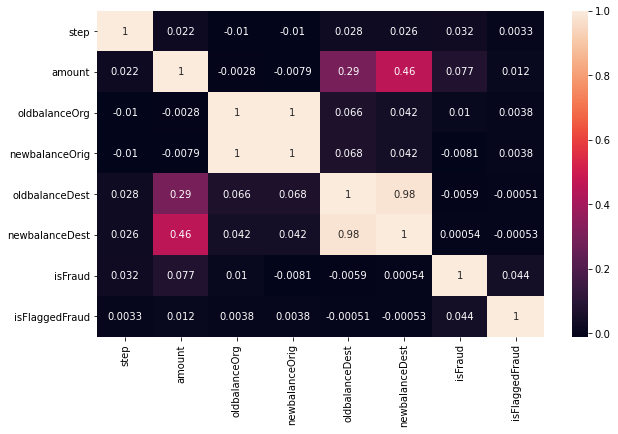

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True)

# Data Cleaning

### Downsampling to handle imbalance

In [15]:
count_class_0, count_class_1 = dataset['isFraud'].value_counts()
count_class_0, count_class_1

(6354407, 8213)

In [16]:
df_class_0 = dataset[dataset['isFraud'] == 0]
df_class_1 = dataset[dataset['isFraud'] == 1]

In [17]:
df_class_0_under = df_class_0.sample(count_class_1)

In [18]:
dataset = pd.concat([df_class_0_under, df_class_1],axis=0)

In [19]:
dataset.shape

(16426, 11)

In [20]:
dataset['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [21]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing value in the dataset

### Handling outliers

We are going to eliminate all the values outside the Interquartile Range, considering 25 percentile and 75 percentile

In [22]:
Q1 = np.percentile(dataset['amount'],25)
Q3 = np.percentile(dataset['amount'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [23]:
dataset = dataset[(dataset['amount']>lower_limit) & (dataset['amount']<upper_limit)]

In [24]:
dataset.shape

(14022, 11)

### Handling multi-collinearity

We will do some feature engineering and according to the Variance Inflation Factor, we will eliminate some of the columns

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [27]:
data = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
vif_data = pd.DataFrame()
vif_data['features'] = data
vif_data['VIF'] = [variance_inflation_factor(dataset[data].values,i) for i in range (len(data))]

In [28]:
vif_data

,features,VIF
0,step,2.291689
1,amount,4.817324
2,oldbalanceOrg,235.650542
3,newbalanceOrig,230.754295
4,oldbalanceDest,209.551704
5,newbalanceDest,213.958054
6,isFraud,2.915471
7,isFlaggedFraud,1.001987


In [29]:
dataset['balance_dest_diff'] = dataset['oldbalanceDest'] - dataset['newbalanceDest']

In [30]:
dataset = dataset.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)

In [31]:
dataset.head()

,step,type,amount,nameOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_dest_diff
4531532,326,PAYMENT,11.53,C2014022217,M600424509,0.0,0.0,0,0,0.0
564997,23,PAYMENT,39712.20,C1942681149,M863027894,0.0,0.0,0,0,0.0
5634908,396,PAYMENT,13589.19,C5853304,M629824036,0.0,0.0,0,0,0.0
4629527,329,PAYMENT,6637.58,C1562772629,M1012724777,0.0,0.0,0,0,0.0
4653731,330,PAYMENT,22345.92,C1085329820,M971097237,0.0,0.0,0,0,0.0


In [32]:
trans_type = pd.get_dummies(dataset['type'],drop_first=True)

In [33]:
dataset = pd.concat([dataset, trans_type],axis=1)

In [34]:
dataset.head()

,step,type,amount,nameOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4531532,326,PAYMENT,11.53,C2014022217,M600424509,0.0,0.0,0,0,0.0,0,0,1,0
564997,23,PAYMENT,39712.20,C1942681149,M863027894,0.0,0.0,0,0,0.0,0,0,1,0
5634908,396,PAYMENT,13589.19,C5853304,M629824036,0.0,0.0,0,0,0.0,0,0,1,0
4629527,329,PAYMENT,6637.58,C1562772629,M1012724777,0.0,0.0,0,0,0.0,0,0,1,0
4653731,330,PAYMENT,22345.92,C1085329820,M971097237,0.0,0.0,0,0,0.0,0,0,1,0


In [35]:
dataset = dataset.drop(['type', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'],axis=1)

In [36]:
dataset.head()

,step,amount,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4531532,326,11.53,0,0,0.0,0,0,1,0
564997,23,39712.20,0,0,0.0,0,0,1,0
5634908,396,13589.19,0,0,0.0,0,0,1,0
4629527,329,6637.58,0,0,0.0,0,0,1,0
4653731,330,22345.92,0,0,0.0,0,0,1,0


In [37]:
data = ['step', 'amount', 'isFraud', 'isFlaggedFraud', 'balance_dest_diff', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
vif_data = pd.DataFrame()
vif_data['features'] = data
vif_data['VIF'] = [variance_inflation_factor(dataset[data].values,i) for i in range (len(data))]

In [38]:
vif_data

,features,VIF
0,step,3.288436
1,amount,2.916135
2,isFraud,3.242842
3,isFlaggedFraud,1.001023
4,balance_dest_diff,2.220249
5,CASH_OUT,3.013967
6,DEBIT,1.007217
7,PAYMENT,1.306077
8,TRANSFER,2.882676


Now the VIF values are pretty much in limit

In [39]:
dataset.describe()

,step,amount,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,14022.000000,1.402200e+04,14022.000000,14022.000000,1.402200e+04,14022.000000,14022.000000,14022.000000,14022.000000
mean,296.115889,2.268479e+05,0.422622,0.000214,-1.179187e+05,0.418129,0.004422,0.197689,0.252175
std,188.627671,2.782961e+05,0.493994,0.014626,2.810215e+05,0.493269,0.066350,0.398271,0.434277
min,1.000000,0.000000e+00,0.000000,0.000000,-9.291518e+06,0.000000,0.000000,0.000000,0.000000
25%,160.000000,2.573648e+04,0.000000,0.000000,-1.704676e+05,0.000000,0.000000,0.000000,0.000000
50%,277.000000,1.251502e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,399.000000,3.065050e+05,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000
max,743.000000,1.305754e+06,1.000000,1.000000,1.429349e+06,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

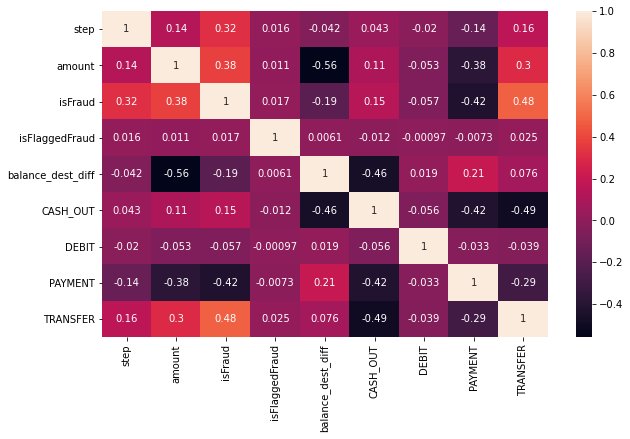

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True)

In [41]:
X = dataset.drop('isFraud',axis=1).values
y = dataset['isFraud'].values

### Train-test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model building

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[1476,  105],
       [ 153, 1071]])

In [52]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1581
           1       0.91      0.88      0.89      1224

    accuracy                           0.91      2805
   macro avg       0.91      0.90      0.91      2805
weighted avg       0.91      0.91      0.91      2805



### Hyperparameter Tuning and cross validation

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

ran_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                 'criterion':['gini', 'entropy']}

In [55]:
ran_cv = RandomizedSearchCV(estimator=rfc, param_distributions=ran_parameters, cv=5, n_jobs=-1, verbose=2)

In [56]:
ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [57]:
confusion_matrix(y_test, ran_cv.predict(X_test))

array([[1501,   80],
       [ 163, 1061]])

In [58]:
print(classification_report(y_test, ran_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1581
           1       0.93      0.87      0.90      1224

    accuracy                           0.91      2805
   macro avg       0.92      0.91      0.91      2805
weighted avg       0.91      0.91      0.91      2805



### XGB

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier()

In [61]:
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[1509,   72],
       [ 115, 1109]])

In [63]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1581
           1       0.94      0.91      0.92      1224

    accuracy                           0.93      2805
   macro avg       0.93      0.93      0.93      2805
weighted avg       0.93      0.93      0.93      2805



### Hyperparameter tuning and cross validation

In [64]:
parameters = {'max_depth': np.arange(2, 12, 2),  
              'alpha': [0, .001, .01, .1],
              'learning_rate': np.linspace(0.001, 0.6, 15),
              'colsample_bytree': np.linspace(0.1, 1, 5),
              'subsample': np.linspace(0.25, 1, 15),
              'n_estimators': np.arange(10, 200, 15),
              'min_child_weight':[1,3,5]}

In [65]:
ran_cv = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, cv=5, verbose=2, n_jobs=1)

In [66]:
ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[13:01:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.775, learning_rate=0.4288571428571428, max_depth=6, min_child_weight=3, n_estimators=115, subsample=0.7857142857142857; total time=   0.8s
[13:01:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.775, learning_rate=0.4288571428571428, max_depth=6, min_child_weight=3, n_estimators=115, subsample=0.7857142857142857; total time=   0.8s
[13:01:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.775, learning_rate=0.4288571428571428, max_depth=6, min_child_weight=3, n_estimators=115, subsample=0.7857142857142857; total time=   0.8s
[13:01:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.775, learning_rate=0.4288571428571428, max_depth=6, min_child_weight=3, n_estimators=115, subsample=0.7857142857142857; total time=   0.7s
[13:01:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.775, learning_rate=0.4288571428571428, max_depth=6, min_child_weight=3, n_estimators=115, subsample=0.7857142857142857; total time=   0.8s
[13:01:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.325, learning_rate=0.17214285714285713, max_depth=8, min_child_weight=5, n_estimators=190, subsample=0.7857142857142857; total time=   0.9s
[13:01:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.325, learning_rate=0.17214285714285713, max_depth=8, min_child_weight=5, n_estimators=190, subsample=0.7857142857142857; total time=   0.8s
[13:01:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.325, learning_rate=0.17214285714285713, max_depth=8, min_child_weight=5, n_estimators=190, subsample=0.7857142857142857; total time=   0.9s
[13:01:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.325, learning_rate=0.17214285714285713, max_depth=8, min_child_weight=5, n_estimators=190, subsample=0.7857142857142857; total time=   1.0s
[13:01:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.325, learning_rate=0.17214285714285713, max_depth=8, min_child_weight=5, n_estimators=190, subsample=0.7857142857142857; total time=   1.0s
[13:01:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.5572142857142857, max_depth=6, min_child_weight=1, n_estimators=40, subsample=0.30357142857142855; total time=   0.3s
[13:01:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.5572142857142857, max_depth=6, min_child_weight=1, n_estimators=40, subsample=0.30357142857142855; total time=   0.3s
[13:01:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.5572142857142857, max_depth=6, min_child_weight=1, n_estimators=40, subsample=0.30357142857142855; total time=   0.3s
[13:01:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.5572142857142857, max_depth=6, min_child_weight=1, n_estimators=40, subsample=0.30357142857142855; total time=   0.3s
[13:01:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.5572142857142857, max_depth=6, min_child_weight=1, n_estimators=40, subsample=0.30357142857142855; total time=   0.3s
[13:01:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.1, learning_rate=0.12935714285714284, max_depth=6, min_child_weight=5, n_estimators=190, subsample=0.35714285714285715; total time=   0.4s
[13:01:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.1, learning_rate=0.12935714285714284, max_depth=6, min_child_weight=5, n_estimators=190, subsample=0.35714285714285715; total time=   0.4s
[13:01:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.1, learning_rate=0.12935714285714284, max_depth=6, min_child_weight=5, n_estimators=190, subsample=0.35714285714285715; total time=   0.4s
[13:01:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.1, learning_rate=0.12935714285714284, max_depth=6, min_child_weight=5, n_estimators=190, subsample=0.35714285714285715; total time=   0.4s
[13:01:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=0.1, learning_rate=0.12935714285714284, max_depth=6, min_child_weight=5, n_estimators=190, subsample=0.35714285714285715; total time=   0.4s
[13:01:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.1, learning_rate=0.34328571428571425, max_depth=10, min_child_weight=3, n_estimators=55, subsample=0.4642857142857143; total time=   0.2s
[13:01:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.1, learning_rate=0.34328571428571425, max_depth=10, min_child_weight=3, n_estimators=55, subsample=0.4642857142857143; total time=   0.2s
[13:01:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.1, learning_rate=0.34328571428571425, max_depth=10, min_child_weight=3, n_estimators=55, subsample=0.4642857142857143; total time=   0.2s
[13:01:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.1, learning_rate=0.34328571428571425, max_depth=10, min_child_weight=3, n_estimators=55, subsample=0.4642857142857143; total time=   0.2s
[13:01:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.1, learning_rate=0.34328571428571425, max_depth=10, min_child_weight=3, n_estimators=55, subsample=0.4642857142857143; total time=   0.2s
[13:01:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.001, colsample_bytree=0.775, learning_rate=0.4716428571428571, max_depth=8, min_child_weight=5, n_estimators=175, subsample=0.4642857142857143; total time=   0.9s
[13:01:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.001, colsample_bytree=0.775, learning_rate=0.4716428571428571, max_depth=8, min_child_weight=5, n_estimators=175, subsample=0.4642857142857143; total time=   0.9s
[13:01:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.001, colsample_bytree=0.775, learning_rate=0.4716428571428571, max_depth=8, min_child_weight=5, n_estimators=175, subsample=0.4642857142857143; total time=   0.9s
[13:01:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.001, colsample_bytree=0.775, learning_rate=0.4716428571428571, max_depth=8, min_child_weight=5, n_estimators=175, subsample=0.4642857142857143; total time=   0.9s
[13:01:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.001, colsample_bytree=0.775, learning_rate=0.4716428571428571, max_depth=8, min_child_weight=5, n_estimators=175, subsample=0.4642857142857143; total time=   0.9s
[13:01:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.55, learning_rate=0.5572142857142857, max_depth=10, min_child_weight=1, n_estimators=70, subsample=0.625; total time=   0.5s
[13:01:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.55, learning_rate=0.5572142857142857, max_depth=10, min_child_weight=1, n_estimators=70, subsample=0.625; total time=   0.5s
[13:01:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.55, learning_rate=0.5572142857142857, max_depth=10, min_child_weight=1, n_estimators=70, subsample=0.625; total time=   0.5s
[13:01:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.55, learning_rate=0.5572142857142857, max_depth=10, min_child_weight=1, n_estimators=70, subsample=0.625; total time=   0.5s
[13:01:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.55, learning_rate=0.5572142857142857, max_depth=10, min_child_weight=1, n_estimators=70, subsample=0.625; total time=   0.5s
[13:01:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.775, learning_rate=0.3005, max_depth=2, min_child_weight=5, n_estimators=70, subsample=0.7857142857142857; total time=   0.2s
[13:01:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.775, learning_rate=0.3005, max_depth=2, min_child_weight=5, n_estimators=70, subsample=0.7857142857142857; total time=   0.2s
[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.775, learning_rate=0.3005, max_depth=2, min_child_weight=5, n_estimators=70, subsample=0.7857142857142857; total time=   0.2s
[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0, colsample_bytree=0.775, learning_rate=0.3005, max_depth=2, min_child_weight=5, n_estimators=70, subsample=0.7857142857142857; total time=   0.2s
[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0, colsample_bytree=0.775, learning_rate=0.3005, max_depth=2, min_child_weight=5, n_estimators=70, subsample=0.7857142857142857; total time=   0.2s
[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0.001, colsample_bytree=0.55, learning_rate=0.2577142857142857, max_depth=4, min_child_weight=1, n_estimators=10, subsample=0.25; total time=   0.0s
[13:01:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END alpha=0.001, colsample_bytree=0.55, learning_rate=0.2577142857142857, max_depth=4, min_child_weight=1, n_

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[CV] END alpha=0.01, colsample_bytree=1.0, learning_rate=0.17214285714285713, max_depth=4, min_child_weight=3, n_estimators=130, subsample=0.25; total time=   0.4s
[13:01:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=1.0, learning_rate=0.17214285714285713, max_depth=4, min_child_weight=3, n_estimators=130, subsample=0.25; total time=   0.4s
[13:01:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=1.0, learning_rate=0.17214285714285713, max_depth=4, min_child_weight=3, n_estimators=130, subsample=0.25; total time=   0.4s
[13:01:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=1.0, learning_rate=0.17214285714285713, max_depth=4, min_child_weight=3, n_estimators=130, subsample=0.25; total time=   0.4s
[13:01:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END alpha=0.01, colsample_bytree=1.0, learning_rate=0.17214285714285713, max_depth=4, min_child_weight=3, n_estimators=130, subsample=0.25; total time=   0.4s
[13:01:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
       0.42885714, 0.47164286, 0.51442857, 0.55721429, 0.6       ]),
                                        'max_depth': array([ 2,  4,

In [67]:
ran_cv.best_params_

{'subsample': 0.7857142857142857,
 'n_estimators': 190,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.17214285714285713,
 'colsample_bytree': 0.325,
 'alpha': 0.1}

In [68]:
confusion_matrix(y_test, ran_cv.predict(X_test))

array([[1507,   74],
       [ 116, 1108]])

In [69]:
print(classification_report(y_test, ran_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1581
           1       0.94      0.91      0.92      1224

    accuracy                           0.93      2805
   macro avg       0.93      0.93      0.93      2805
weighted avg       0.93      0.93      0.93      2805



##### Important features considered by the XGBoost model and their level of importance:

In [75]:
importance_df = pd.DataFrame({'Feature_name':(dataset.drop('isFraud',axis=1).columns), 'Importance':xgb.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

<AxesSubplot:xlabel='Feature_name', ylabel='Importance'>

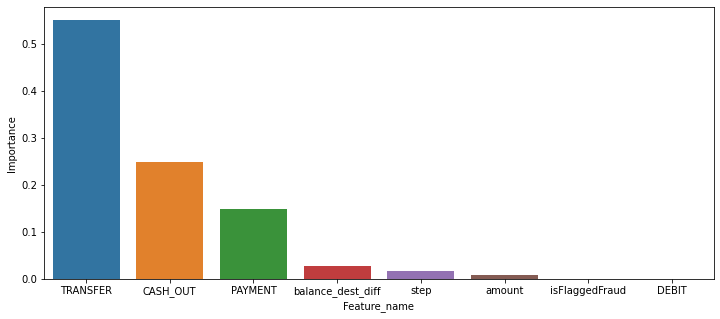

In [83]:
plt.figure(figsize=(12,5))
sns.barplot(x='Feature_name', y='Importance', data=importance_df)

In [84]:
import pickle
file = open('xgb_model.pkl', 'wb')
pickle.dump(xgb, file)

## In conclusion we

Loaded the dataset.

Did Exploratory Data Analysis.

Processed the data, performed downsampling to handle imbalance, handled missing values and outliers, handled multicollinearity.

Built Random Forest and XGBoost classification models to predict whether transaction is fraud.

Optimized the models with hyperparameter tuning using RandomizedSearchCV and GridsearchCV.

Optimized XGBoost model fits the best to the dataset with accuracy of 0.93 and precision of 0.94. 

1. The dataset doesn't consist any missing value. For ouliers removal I have used the IQR (Interquartile Range) method considering 25 percentile and 75 percentile and considered the data between the upper and the lower limit. For muticollinearity problem I have used VIF (Variance Inflation Factor) method and eliminated some of the columns with very high VIF.

2. The fraud detection model (XGBoost) tries to analyze the pattern of fraudulent transactions by making use of different modelling techniques and using the results obtained from our study we intend to predict and prevent similar fraud cases in future.The model detects fraud based on factors like transaction amount, type of transaction, step, difference of balance before and after the transaction, whether the final balance is zero or not etc.

3. For selecting variables including in the model I have plotted the heatmap of correlation. The 'oldbalanceOrg' and 'newbalanceOrig' columns are perfectly correlated and the difference of these is equal to the amount column already present in the dataset. So I have dropped the two. Again 'oldbalanceDest' and 'newbalanceDest' columns are very highly correlated. So I have extracted a feature named balance_dest_diff by subtracting these two columns and then dropped the two. I have converted the type column into categorical variables. Four columns - step, amount, CASH_OUT and TRANSFER are the most important features to be included in the model as they have relatively good correlation with the target column.

4. The dataset is imbalanced, so here precision matters more than the accuracy. XGBoost model has the highest precision(0.95) and also has the accuracy score of 1.

5. From the heatmap of correlation, it is seen that step, amount, CASH_OUT, TRANSFER and isFlaggedFraud are the 5 key factors that predict fraudulent customers. The XGBoost model has considered CASH_OUT, balance_diff, step, amount and TRANSFER - these 5 columns as the most important columns.

6. These factors actually make sense. We have seen that if amount of transaction is more than $ 200000, it is more likely to be fraudulent. In actual also this much amount of transaction is hardly made at once, except in some cases. Fraudulent transaction is obviously of Cash-out type, which is one of the most important key factors. Transfer type transaction may be a fraudulent as here amount got deducted from the acount, which is one of the factors. Payment type transaction also may be a fraudulent as here also amount got deducted from the acount. One more feature should be an important factor for detecting fraud transaction is the DEBIT column, but the heatmap of correlation and the our model doesnot considered it as an important factor. The step column may or may not be a factor, as it indicates a unit of time when the transactions got carried out, and fraud transaction can got carried out at any point of time.

7. The financial company should hire fraud blocking company, which creates an automatic transaction fraud analysis, based on transaction type, amount of transaction, final balance after the transaction based on a large transactions dataset.